In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
url = "https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv"
data = pd.read_csv(url, delimiter = ';')

In [5]:
data.set_index('Date_of_report', inplace=True)

In [21]:
data.index = pd.to_datetime(data.index)
data.Date_of_publication = pd.to_datetime(data.Date_of_publication)

In [22]:
gr_data = data.groupby(data.Date_of_publication).sum()

In [91]:
def vline(date, text, plot_distance=True):
    plt.vlines(date, 0, 12500, linestyle = '--', color = 'k', linewidth = 1)
    plt.text(date-dt.timedelta(days=3), 13000, text, rotation = 90)
    if plot_distance:
        plt.text(date-dt.timedelta(days=7), -600, (date-min(gr_data.index)).days, color='white')

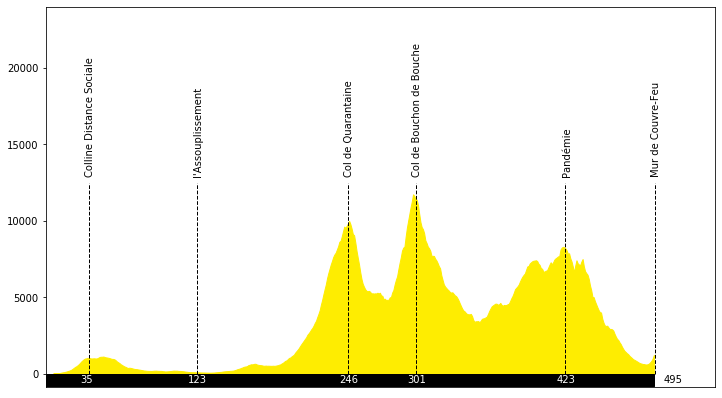

In [100]:
plt.figure(figsize=(12,7))
plt.fill_between(gr_data.index, gr_data['Total_reported']*0, gr_data['Total_reported'].rolling(7).mean(), 
                color = (254/255, 237/255, 1/255))

plt.fill_between([dt.datetime(2020,1,1), max(gr_data.index)], [-800, -800], [0,0],
                color = 'black')

vline(dt.datetime(2020, 4,2), "Colline Distance Sociale")
vline(dt.datetime(2020, 6,29), "l'Assouplissement")
vline(dt.datetime(2020, 10,30), "Col de Quarantaine")

vline(dt.datetime(2020,12,24), "Col de Bouchon de Bouche")
vline(dt.datetime(2021,4,25), "Pandémie")
vline(dt.datetime.today(), "Mur de Couvre-Feu", plot_distance=False)
plt.text(dt.datetime.today()+dt.timedelta(days=7), -600, (dt.datetime.today()-min(gr_data.index)).days, color='black')
plt.ylim(-900, 24000)
plt.xlim(min(gr_data.index), max(gr_data.index)+dt.timedelta(days=50))
plt.xticks([])
plt.savefig("TDF_corona_edition.png", dpi=200)